# Pandas Basics — Part 2

In this lesson, we're going to introduce some more fundamentals of [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files.

We will review skills learned from the last lesson and introduce how to:

* Broadly examine data
* Work with missing data
* Rename, drop, and add new columns
* Perform mathematical calculations
* Aggregate subsets of data
* Make a simple time series

___

## 1. About the Dataset - The Trans-Atlantic Slave Trade Database

<blockquote class="epigraph" style=" padding: 10px">

[D]isplaying data alone could not and did not offer the atonement descendants of slaves
sought or capture the inhumanity of this archive’s formation.

-Jessica Marie Johnson, <a href="https://read.dukeupress.edu/social-text/article/36/4%20(137)/57/137032/Markup-BodiesBlack-Life-Studies-and-Slavery-Death">“Markup Bodies”</a>

</blockquote>


The dataset that we're going to be working with in this lesson is taken from [The Trans-Atlantic Slave Trade Database](https://www.slavevoyages.org/voyage/database), part of the [*Slave Voyages* project](https://www.slavevoyages.org/). The larger database includes information about 35,000 slave-trading voyages from 1514-1866. The dataset we're working with here was filtered to include the 20,000 voyages that landed in the Americas. The data was filtered to also include the percentage of enslaved men, women, and children on the voyages.

We're working with this data for a number of reasons. The *Slave Voyages* project is a major data-driven contribution to the history of slavery and to the field of the digital humanities. Before the Trans-Atlantic Slave Trade Database, as DH scholar Jessica Johnson [writes,](https://read.dukeupress.edu/social-text/article-abstract/36/4%20(137)/57/137032/Markup-BodiesBlack-Life-Studies-and-Slavery-Death?redirectedFrom=fulltext) "historians assumed enslaved women and children played a negligible role in the slave trade." But evidence from the Trans-Atlantic Slave Trade Database suggested otherwise. "The existence of the Trans-Atlantic Slave Trade Database immediately reshaped debates about numbers of women and children exported from the continent," Johnson says, "influencing work on women in the slave trade on the African coast, slavery in African societies, and women in the slave trade to the Americas."

Though the Trans-Atlantic Slave Trade Database helped shed new light on the roles of enslaved women and children, Johnson makes clear that it was not computation or data alone that shed this light: 
> [D]isplaying data alone could not and did not offer the atonement descendants of slaves sought or capture the inhumanity of this archive’s formation. Culling the lives of women and children from the data set required approaching the data with intention. It required a methodology attuned to black life and to dismantling the methods used to create the manifests in the first place, then designing and launching an interface responsive to the desire of descendants of slaves for reparation and redress.

In this spirit, we want to think about how responsible data analysis requires more than just data and technical tools like Pandas. It requires approaching data with intention and developing methodologies geared toward justice. This is especially necessary when dealing with data that records and perpetrates violence like the Trans-Atlantic Slave Trade Database.

___

## 2. Setup Our Data Work

### 2.1 Import Pandas

To use the Pandas library, we first need to `import` it.

In [1]:
import pandas as pd

The above `import` statement not only imports the Pandas library but also gives it an alias or nickname — `pd`. This alias will save us from having to type out the entire words `pandas` each time we need to use it. Many Python libraries have commonly used aliases like `pd`.

**Set Display Settings**

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [2]:
pd.options.display.max_rows = 100

### 2.2 Read in CSV File

**TIP**: If you use the `help()` function, you can see the documentation for almost any bit of code. If we run it on `pd.read_csv()`, we can see all the possible parameters that can be used with `pd.read_csv()`.
help(pd.read_csv)

In [3]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbos

To read in a CSV file, we will use the function `pd.read_csv()` and insert the name of our desired file path. 

In [4]:
slave_voyages_df = pd.read_csv('../data/03-pandas/Trans-Atlantic-Slave-Trade_Americas.csv', delimiter=",", encoding='utf-8')

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#DataFrame) — often abbreviated as *df*, e.g., *slave_voyages_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

When reading in the CSV file, we also specified the `encoding` and `delimiter`. The `delimiter` specifies the character that separates or "delimits" the columns in our dataset. For CSV files, the delimiter will most often be a comma. (CSV is short for *Comma Separated Values*.) Sometimes, however, the delimiter of a CSV file might be a tab (`\t`) or, more rarely, another character.

### 2.3 Display Data

We can display a DataFrame in a Jupyter notebook simply by running a cell with the variable name of the DataFrame.

<div style="background:lightblue; color:white; padding:10px">
<p><strong>Pandas Review</strong>: <code style="color:black">NaN</code> is the Pandas value for any missing data. See <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?highlight=nan/" style="color:black">"Working with missing data"</a> for more information.
</div>

In [5]:
slave_voyages_df

,year_of_arrival,flag,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,"[u'AGI,Patronato 175, r.9<><p><em>AG!</em> (Se..."
1,1525,Portugal / Brazil,Sao Tome,"Hispaniola, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Maria de Bogoña,"Monteiro, Pero",46473,"[u'ANTT,CC,Parte II, maco 131, doc 54<><i>Inst..."
2,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11297,"[u'Pike,60-1,172<>Pike, Ruth, <i>Enterprise</i..."
3,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11298,"[u'Pike,60-1,172<>Pike, Ruth, <i>Enterprise</i..."
4,1526,NaN,Cape Verde Islands,Caribbean (colony unspecified),NaN,NaN,NaN,359.0,287.0,NaN,S Anton,"Leon, Juan de",42631,"[u'Chaunus, 3: 162-63<><p>Chaunus, <em>xxxxxx<..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20736,1864,Spain / Uruguay,"Africa., port unspecified","Cuba, port unspecified",NaN,NaN,NaN,488.0,465.0,NaN,Polaca,NaN,46554,"[u'AHNM, Ultramar, Leg. 3551, 6<><i>Archivo Hi..."
20737,1865,Spain / Uruguay,"Africa., port unspecified",Isla de Pinas,NaN,NaN,NaN,152.0,145.0,Slave insurrection,Gato,NaN,4394,"[u'IUP,ST,50/B/137<>Great Britain, <i>Irish Un..."
20738,1865,NaN,"Africa., port unspecified",Mariel,NaN,NaN,NaN,780.0,650.0,NaN,,NaN,4395,"[u'IUP,ST,50/B/144<>Great Britain, <i>Irish Un..."
20739,1865,NaN,Congo River,"Cuba, port unspecified",NaN,NaN,NaN,1265.0,1004.0,NaN,Cicerón,Mesquita,5052,"[u'IUP,ST,50/A/23-4<>Great Britain, <i>Irish U..."


There are a few important things to note about the DataFrame displayed here:

* Index
    * The bolded ascending numbers in the very left-hand column of the DataFrame is called the Pandas *Index*. You can select rows based on the Index.
    * By default, the Index is a sequence of numbers starting with zero. However, you can change the Index to something else, such as one of the columns in your dataset.

* Truncation
    * The DataFrame is truncated, signaled by the ellipses in the middle `...` of every column.
    * The DataFrame is truncated because we set our default display settings to 100 rows. Anything more than 100 rows will be truncated. To display all the rows, we would need to alter Pandas' default display settings yet again.

* Rows x Columns
    * Pandas reports how many rows and columns are in this dataset at the bottom of the output (20,741 x 14 columns).

### 2.4 Display First *n* Rows

To look at the first *n* rows in a DataFrame, we can use a method called `.head()`.

In [6]:
slave_voyages_df.head(10)

,year_of_arrival,flag,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,"[u'AGI,Patronato 175, r.9<><p><em>AG!</em> (Se..."
1,1525,Portugal / Brazil,Sao Tome,"Hispaniola, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Maria de Bogoña,"Monteiro, Pero",46473,"[u'ANTT,CC,Parte II, maco 131, doc 54<><i>Inst..."
2,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11297,"[u'Pike,60-1,172<>Pike, Ruth, <i>Enterprise</i..."
3,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11298,"[u'Pike,60-1,172<>Pike, Ruth, <i>Enterprise</i..."
4,1526,NaN,Cape Verde Islands,Caribbean (colony unspecified),NaN,NaN,NaN,359.0,287.0,NaN,S Anton,"Leon, Juan de",42631,"[u'Chaunus, 3: 162-63<><p>Chaunus, <em>xxxxxx<..."
5,1526,NaN,Cape Verde Islands,San Domingo (a) Santo Domingo,NaN,NaN,NaN,359.0,287.0,NaN,Santa Maria de Guadalupe,"Pabon, Francisco",42679,"[u'Chaunus, 3: 162-63<><p>Chaunus, <em>xxxxxx<..."
6,1526,Portugal / Brazil,Sao Tome,"Spanish Caribbean, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,NaN,46474,"[u'ANTT,CC,Parte II, maco 131, doc 54<><i>Inst..."
7,1527,Spain / Uruguay,Cape Verde Islands,"Puerto Rico, port unspecified",NaN,NaN,NaN,325.0,260.0,NaN,Concepción,"Díaz, Alonso",99027,"[u'SuedBadillo,57,75,76<><p>SuedBadillo, <em>x..."
8,1532,Portugal / Brazil,Sao Tome,"Spanish Caribbean, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Antônio,"Afonso, Martim",11293,"[u'Ryder,66<>Ryder, A. F. C., <i>Benin</i><i> ..."
9,1532,NaN,Cape Verde Islands,San Juan,NaN,NaN,NaN,25.0,20.0,NaN,,"de Illanes, Manuel",28994,"[u'Tanodi, 321-22<>Tanodi, Aurelio, <i>Documen..."


## 3. Examine Data

### 3.1 Shape

To explicitly check for how many rows vs columns make up a dataset, we can use the `.shape` method.

In [7]:
slave_voyages_df.shape

(20741, 14)

There are 20,741 rows and 14 columns.

### 3.2 Data Types

Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

In [8]:
slave_voyages_df.dtypes

year_of_arrival        int64
flag                  object
place_of_purchase     object
place_of_landing      object
percent_women        float64
percent_children     float64
percent_men          float64
total_embarked       float64
total_disembarked    float64
resistance_label      object
vessel_name           object
captain's_name        object
voyage_id              int64
sources               object
dtype: object

It's important to always check the data types in your DataFrame. For example, sometimes numeric values will accidentally be interpreted as a string object. To perform calculations on this data, you would need to first convert that column from a string to an integer.

### 3.3 Columns

We can also check the column names of the DataFrame with [`.columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html)

In [9]:
slave_voyages_df.columns

Index(['year_of_arrival', 'flag', 'place_of_purchase', 'place_of_landing',
       'percent_women', 'percent_children', 'percent_men', 'total_embarked',
       'total_disembarked', 'resistance_label', 'vessel_name',
       'captain's_name', 'voyage_id', 'sources'],
      dtype='object')

### 3.4 Summary Statistics

In [10]:
slave_voyages_df.describe(include='all')

,year_of_arrival,flag,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
count,20741.000000,19583,20663,20741,2894.000000,2927.000000,2894.000000,20722.000000,20719.000000,372,20741,19396,20741.000000,20741
unique,NaN,8,156,187,NaN,NaN,NaN,NaN,NaN,6,5849,12233,NaN,13754
top,NaN,Great Britain,"Africa., port unspecified","Barbados, port unspecified",NaN,NaN,NaN,NaN,NaN,Slave insurrection,,"Smith, John",NaN,"[u'mettas,I<>Mettas, Jean, <i>R\xe9pertoire d..."
freq,NaN,10536,5999,2038,NaN,NaN,NaN,NaN,NaN,330,712,36,NaN,1134
mean,1752.014850,NaN,NaN,NaN,0.274198,0.231582,0.496648,295.050381,251.573966,NaN,NaN,NaN,42783.741671,NaN
std,59.702189,NaN,NaN,NaN,0.116513,0.149508,0.140324,147.997690,128.050439,NaN,NaN,NaN,32401.785320,NaN
min,1520.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,112.000000,NaN
25%,1724.000000,NaN,NaN,NaN,0.195265,0.115380,0.407460,194.000000,163.000000,NaN,NaN,NaN,17862.000000,NaN
50%,1765.000000,NaN,NaN,NaN,0.264110,0.215100,0.497890,282.000000,241.000000,NaN,NaN,NaN,31916.000000,NaN
75%,1792.000000,NaN,NaN,NaN,0.346150,0.321900,0.586765,368.000000,313.000000,NaN,NaN,NaN,78283.000000,NaN


## 4. Missing Data

<blockquote>
The conceit of the archive is that it is the repository of answers, of knowable conclusions, of the data needed to explain or understand the past.
<br><br>
The reality, however, is that the archive is the troubled genesis of our always-failed effort to unravel the effects of the past on the present; rather than verifiable truths, the archive — and its silences — house the very questions that unsettle us.
</blockquote>

-- Jennifer Morgan, ["Accounting for 'The Most Excruciating Torment'"](https://read.dukeupress.edu/history-of-the-present/article-abstract/6/2/184/153282/Accounting-for-The-Most-Excruciating-Torment?redirectedFrom=PDF)

Responsible data analysis requires understanding missing data. The Trans-Atlantic Slave Trade Database, as historian Jennifer Morgan [writes](https://read.dukeupress.edu/history-of-the-present/article-abstract/6/2/184/153282/Accounting-for-The-Most-Excruciating-Torment?redirectedFrom=PDF), contains innumerable "silences" and "gaps." These silences include the thoughts, feelings, and experiences of the enslaved African people on board the voyages — silences that cannot be found in the database itself.

There are other kinds of silences and gaps that can be detected in the database itself, however. For example, while some of the voyages in the the Trans-Atlantic Slave Trade Database recorded information about how many enslaved women and children were aboard, most did not. Yet focusing on the data that is there and analyzing trends in the missing data can help shed light on the history of gender and enslavement. The fact that most ship captains did not record gender information, Morgan argues, helps tell us about their "priorities": "[W]e can assume that had it been financially significant to have more men than women that data would have been more scrupulously recorded."

### 4.1 .isna() / .notna()

Pandas has special ways of dealing with missing data. As you may have already noticed, blank rows in a CSV file show up as `NaN` in a Pandas DataFrame.

To filter and count the number of missing/not missing values in a dataset, we can use the special `.isna()` and `.notna()` methods on a DataFrame or Series object.

In [11]:
slave_voyages_df['percent_women'].notna()

0        False
1        False
2        False
3        False
4        False
         ...  
20736    False
20737    False
20738    False
20739    False
20740    False
Name: percent_women, Length: 20741, dtype: bool

The `.isna()` and `.notna()` methods return True/False pairs for each row, which we can use to filter the DataFrame for any rows that have information in a given column. For example, we can filter the DataFrame for only rows that have information about the percentage of enslaved women aboard the voyage.

In [12]:
slave_voyages_df[slave_voyages_df['percent_women'].notna()]

,year_of_arrival,flag,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
938,1613,Portugal / Brazil,Luanda,Santo Tomas,0.30556,0.20588,0.69444,362.0,290.0,NaN,NS de Nazareth,"Gómez, Juan",47352,"[u'AGI-Esc 38B, pieza 2, folios 427r-427v<><p>..."
1044,1619,Portugal / Brazil,Luanda,Veracruz,0.21127,0.21596,0.57277,349.0,279.0,NaN,S Antônio,"Acosta, Jacome de",29248,"[u'Vila Vilar,Cuadro3<><p>Vila Vilar, Enriquet..."
1115,1620,Portugal / Brazil,Luanda,Buenos Aires,0.13043,0.29193,0.57764,381.0,304.0,NaN,NS de Consolación,"Acosta, Gonçalo",29561,"[u'AGI, Indiferente General, 2795<><p><em>AG!<..."
1117,1620,NaN,Luanda,Cumana,0.29570,0.33571,0.70430,421.0,337.0,NaN,NS de Rocha,"Sosa, Nicolás de<br/> Estéves, Domingo<br/> Ro...",29941,"[u'AGI, Contratacion, 2881<><p><em>AG!</em> (S..."
1334,1628,Portugal / Brazil,"West Central Africa and St. Helena, port unspe...","Spanish Circum-Caribbean,unspecified",0.16908,0.58454,0.24638,303.0,242.0,NaN,S Pedro,"Silva, Jacinto da",29568,"[u'AGI, Indiferente General, 2796<><p><em>AG!<..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20295,1841,Portugal / Brazil,Rio Pongo,"Cuba, port unspecified",0.20548,0.21233,0.58219,324.0,292.0,NaN,Segunda Rosália,"Peirano, Francisco",2078,"[u'PP,1845,XLIX:593-633<>Great Britain, <i>Par..."
20321,1841,Spain / Uruguay,"Africa., port unspecified","Bahamas, port unspecified",0.15758,0.31548,0.53939,215.0,193.0,NaN,Trovadore,"Velasea, de Bonita",5503,"[u'Dalleo,24<>Dalleo, Peter D.,""Africans in th..."
20429,1850,NaN,Benguela,"British Caribbean, colony unspecified",0.00000,1.00000,0.00000,94.0,74.0,NaN,Amélia,"Oliveira, José",4674,"[u'IUP,ST,38/A/208<>Great Britain, <i>Irish Un..."
20498,1854,U.S.A.,Whydah,Bahia Honda,0.45455,0.08333,0.54545,600.0,584.0,NaN,Grey Eagle,Darnaud,4190,"[u'FO84/965,Crawford,55.02.07,enc<><p><em>BNA<..."


The data is now filtered to only include the 2,894 rows with information about how many women were aboard the voyage.

To explicitly count the number of blank rows, we can use the `.value_counts()` method.

In [13]:
slave_voyages_df['percent_women'].isna().value_counts()

percent_women
True     17847
False     2894
Name: count, dtype: int64

There are 17,874 that do not contain information about the number of enslaved women on the voyage (`isna` = True) and 2,894 rows that do contain this information (`isna` = False).

To quickly transform these numbers into percentages, we can set the `normalize=` parameter to True.

In [14]:
slave_voyages_df['percent_women'].isna().value_counts(normalize=True)

percent_women
True     0.86047
False    0.13953
Name: proportion, dtype: float64

About 14% of rows in this dataset have information about the number of enslaved women on the voyage while 86% do not.

### 4.2 .count()

Because the `.count()` method always excludes NaN values, we can also count the number of values in each column and divide by the total number of rows in each column (`len()`) to find the percentage of not blank data in every column.

In [15]:
slave_voyages_df.count() / len(slave_voyages_df)

year_of_arrival      1.000000
flag                 0.944169
place_of_purchase    0.996239
place_of_landing     1.000000
percent_women        0.139530
percent_children     0.141121
percent_men          0.139530
total_embarked       0.999084
total_disembarked    0.998939
resistance_label     0.017935
vessel_name          1.000000
captain's_name       0.935153
voyage_id            1.000000
sources              1.000000
dtype: float64

For example, 100% of the rows in the columns "year_of_arrival" contain information, while 2% of the rows in the column "resistance_label" contain information. The "resistance_label" indicates whether there is a record of the enslaved Africans aboard the voyage staging some form of resistance.

### 4.3 .fillna()

If we wanted, we could fill the `NaN` values in the DataFrame with a different value by using the `.fillna()` method.

In [16]:
slave_voyages_df['percent_women'].fillna('no gender information recorded')

0        no gender information recorded
1        no gender information recorded
2        no gender information recorded
3        no gender information recorded
4        no gender information recorded
                      ...              
20736    no gender information recorded
20737    no gender information recorded
20738    no gender information recorded
20739    no gender information recorded
20740    no gender information recorded
Name: percent_women, Length: 20741, dtype: object

## 5. Rename Columns

We can rename columns with the [`.rename()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) and the `columns=` parameter. For example, we can rename the "flag" column "national_affiliation."

In [17]:
slave_voyages_df.rename(columns={'flag': 'national_affiliation'})

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,"[u'AGI,Patronato 175, r.9<><p><em>AG!</em> (Se..."
1,1525,Portugal / Brazil,Sao Tome,"Hispaniola, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Maria de Bogoña,"Monteiro, Pero",46473,"[u'ANTT,CC,Parte II, maco 131, doc 54<><i>Inst..."
2,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11297,"[u'Pike,60-1,172<>Pike, Ruth, <i>Enterprise</i..."
3,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11298,"[u'Pike,60-1,172<>Pike, Ruth, <i>Enterprise</i..."
4,1526,NaN,Cape Verde Islands,Caribbean (colony unspecified),NaN,NaN,NaN,359.0,287.0,NaN,S Anton,"Leon, Juan de",42631,"[u'Chaunus, 3: 162-63<><p>Chaunus, <em>xxxxxx<..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20736,1864,Spain / Uruguay,"Africa., port unspecified","Cuba, port unspecified",NaN,NaN,NaN,488.0,465.0,NaN,Polaca,NaN,46554,"[u'AHNM, Ultramar, Leg. 3551, 6<><i>Archivo Hi..."
20737,1865,Spain / Uruguay,"Africa., port unspecified",Isla de Pinas,NaN,NaN,NaN,152.0,145.0,Slave insurrection,Gato,NaN,4394,"[u'IUP,ST,50/B/137<>Great Britain, <i>Irish Un..."
20738,1865,NaN,"Africa., port unspecified",Mariel,NaN,NaN,NaN,780.0,650.0,NaN,,NaN,4395,"[u'IUP,ST,50/B/144<>Great Britain, <i>Irish Un..."
20739,1865,NaN,Congo River,"Cuba, port unspecified",NaN,NaN,NaN,1265.0,1004.0,NaN,Cicerón,Mesquita,5052,"[u'IUP,ST,50/A/23-4<>Great Britain, <i>Irish U..."


Renaming the "flag" column as above will only momentarily change that column's name, however. If we display our DataFrame, we will see that the column name has *not* changed permamently.

In [18]:
slave_voyages_df.head(1)

,year_of_arrival,flag,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,"[u'AGI,Patronato 175, r.9<><p><em>AG!</em> (Se..."


To save changes in the DataFrame, we need to reassign the DataFrame to the same variable.

In [19]:
slave_voyages_df = slave_voyages_df.rename(columns={'flag': 'national_affiliation'})

In [20]:
slave_voyages_df.head(1)

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,"[u'AGI,Patronato 175, r.9<><p><em>AG!</em> (Se..."


## 6. Drop Columns

We can remove a column from the DataFrame with the `.drop()` method and the column name.

In [21]:
slave_voyages_df = slave_voyages_df.drop(columns="sources")

In [22]:
slave_voyages_df.columns

Index(['year_of_arrival', 'national_affiliation', 'place_of_purchase',
       'place_of_landing', 'percent_women', 'percent_children', 'percent_men',
       'total_embarked', 'total_disembarked', 'resistance_label',
       'vessel_name', 'captain's_name', 'voyage_id'],
      dtype='object')

## 7. Add Columns

To add a column, we simply put a new column name in square brackets and set it equal to whatever we want the new column to be.

For example, if we wanted to create new columns for the total women and men aboard each voyage, we could set them equal to the product of the "total_disembarked" column * the "percent_women" / "percent_men" columns.

In [24]:
slave_voyages_df['total_women'] = slave_voyages_df['total_embarked'] * slave_voyages_df['percent_women']

In [25]:
slave_voyages_df['total_men'] = slave_voyages_df['total_embarked'] * slave_voyages_df['percent_men']

If we scroll all the way to the right side of the DataFrame, we can see that these columns have been added.

In [26]:
slave_voyages_df.head(1)

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,NaN,NaN


## 8. Sort Columns

We can sort a DataFrame with the `.sort_values()` method, inside of which we include the parameter `by=` and indicate the name of the column we want to sort by (written in quotation marks).

For example, we can sort the DataFrame by the voyages that had the largest proportion of enslaved women aboard.

In [27]:
slave_voyages_df.sort_values(by='percent_women', ascending=False)

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
19042,1819,Spain / Uruguay,Luanda,Havana,1.00000,0.00000,0.00000,82.0,73.0,NaN,S José Diligente,Estepa,14378,82.00000,0.00000
4269,1715,France,"Senegambia and offshore Atlantic, port unspeci...",Cap Francais,0.74747,0.16162,0.09091,120.0,118.0,NaN,Elisabeth,Beliveau,31883,89.69640,10.90920
1741,1659,Netherlands,Bonny,"Jamaica, port unspecified",0.72500,0.05882,0.27500,195.0,85.0,NaN,S Jan,"Veer, Adriaen Blaes van der",21566,141.37500,53.62500
19047,1819,Spain / Uruguay,"Africa., port unspecified",Havana,0.71429,0.00000,0.28571,178.0,161.0,NaN,Descubridor,Benoit<br/> Valdes,14868,127.14362,50.85638
18950,1818,Spain / Uruguay,"Africa., port unspecified",Havana,0.69355,0.30645,0.00000,69.0,62.0,NaN,Vencedor,Iturrondo,14857,47.85495,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20736,1864,Spain / Uruguay,"Africa., port unspecified","Cuba, port unspecified",NaN,NaN,NaN,488.0,465.0,NaN,Polaca,NaN,46554,NaN,NaN
20737,1865,Spain / Uruguay,"Africa., port unspecified",Isla de Pinas,NaN,NaN,NaN,152.0,145.0,Slave insurrection,Gato,NaN,4394,NaN,NaN
20738,1865,NaN,"Africa., port unspecified",Mariel,NaN,NaN,NaN,780.0,650.0,NaN,,NaN,4395,NaN,NaN
20739,1865,NaN,Congo River,"Cuba, port unspecified",NaN,NaN,NaN,1265.0,1004.0,NaN,Cicerón,Mesquita,5052,NaN,NaN


By default, Pandas will sort in "ascending" order, from the smallest value to the largest value. If we want to sort the largest values first, we need to include another parameter `ascending=False`.

Because the DataFrame is truncated when it has more than 100 rows, we can use a Python list slice to view the top 30 (or any number less than 100) voyages with enslaved women aboard.

In [28]:
slave_voyages_df.sort_values(by='percent_women', ascending=False)[:30]

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
19042,1819,Spain / Uruguay,Luanda,Havana,1.00000,0.00000,0.00000,82.0,73.0,NaN,S José Diligente,Estepa,14378,82.00000,0.00000
4269,1715,France,"Senegambia and offshore Atlantic, port unspeci...",Cap Francais,0.74747,0.16162,0.09091,120.0,118.0,NaN,Elisabeth,Beliveau,31883,89.69640,10.90920
1741,1659,Netherlands,Bonny,"Jamaica, port unspecified",0.72500,0.05882,0.27500,195.0,85.0,NaN,S Jan,"Veer, Adriaen Blaes van der",21566,141.37500,53.62500
19047,1819,Spain / Uruguay,"Africa., port unspecified",Havana,0.71429,0.00000,0.28571,178.0,161.0,NaN,Descubridor,Benoit<br/> Valdes,14868,127.14362,50.85638
18950,1818,Spain / Uruguay,"Africa., port unspecified",Havana,0.69355,0.30645,0.00000,69.0,62.0,NaN,Vencedor,Iturrondo,14857,47.85495,0.00000
19037,1819,Spain / Uruguay,Ambriz,Havana,0.68456,0.00000,0.31544,164.0,149.0,NaN,Supremo Habanero,"Blanco, Pedro",14372,112.26784,51.73216
4894,1721,France,Benin,"Martinique, port unspecified",0.67797,0.15254,0.16949,69.0,59.0,NaN,Saint Jean Triomphant,"Gaulart, J",33087,46.77993,11.69481
4150,1714,Great Britain,Calabar,Saint John (Antigua),0.66667,0.16667,0.33333,360.0,240.0,NaN,Florida,"Payne, Samuel",75489,240.00120,119.99880
6259,1734,Netherlands,Jacquin,Suriname,0.66480,0.09078,0.24441,716.0,374.0,NaN,Rusthof,"Bovenmans, Anthony<br/> Theunissen, Willem",10278,475.99680,174.99756
1823,1664,Great Britain,New Calabar,"Barbados, port unspecified",0.65217,0.08696,0.26087,242.0,168.0,NaN,Elizabeth,"Francis, William",9558,157.82514,63.13054


If we want to sort a Series object, we don't need to use the `by=` paramter.

In [29]:
slave_voyages_df['total_women'].sort_values(ascending=False)

6259     475.996800
18822    316.640164
2264     311.833480
6163     303.000180
3129     301.764000
            ...    
20736           NaN
20737           NaN
20738           NaN
20739           NaN
20740           NaN
Name: total_women, Length: 20741, dtype: float64

## 9. Calculate Series Columns (a review)

We can do different calculations on columns with built-in Pandas functions. These calculations will ignore `NaN` values.

| Pandas calculations | Explanation                         |
|----------|-------------------------------------|
| `.count()`    | Number of observations    |
| `.sum()`      | Sum of values                       |
| `.mean()`     | Mean of values                      |
| `.median()`   | Median of values         |
| `.min()`      | Minimum                             |
| `.max()`      | Maximum                             |
| `.mode()`     | Mode                                |
| `.std()`      | Unbiased standard deviation         |



For example, to find the average proprotion of enslaved women aboard the voyages (for voyages that have this information), we can use the `.mean()` method.

In [30]:
slave_voyages_df['percent_women'].mean()

0.27419760653973735

There were on average 27% enslaved women aboard the voyages for voyages that recorded this information.

In [31]:
slave_voyages_df['percent_women'].max()

1.0

The highest percentage of women aboard the slave voyages was 100%. We can use this calculation as a filter to identify the voyage(s) with this maximum value.

In [32]:
slave_voyages_df[slave_voyages_df['percent_women'] == slave_voyages_df['percent_women'].max()]

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
19042,1819,Spain / Uruguay,Luanda,Havana,1.0,0.0,0.0,82.0,73.0,NaN,S José Diligente,Estepa,14378,82.0,0.0


According to the Trans-Atlantic Slave Trade Database, the 1819 voyage of the S José Diligente had 100% enslaved women aboard.

As demonstrated previously, we can also perform calculations with columns themselves.

In [33]:
(slave_voyages_df['total_embarked'] * slave_voyages_df['percent_women']).max()

475.99679999999995

## 10. Groupby Columns

The Pandas function`.groupby()` allows us to group data and perform calculations on the groups.

For example, Jennifer Morgan writes about how some nations recorded more information about the gender of the enslaved people aboard their voyages than other nations did. To see the breakdown of gender information by nation, we can use a `.groupby()` function.

The first step to using groupby is to type the name of the DataFrame followed by `.groupby()` with the column we'd like to aggregate based on, such as "national_affiliation."

In [34]:
slave_voyages_df.groupby('national_affiliation')

This action will created a [GroupBy object](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). We can perform calculations on this grouped data, such as counting the number of non-blank values in each column for each nation.

In [35]:
slave_voyages_df.groupby('national_affiliation').count()

,year_of_arrival,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
national_affiliation,,,,,,,,,,,,,,
Denmark / Baltic,290,290,290,119,119,119,290,290,8,290,163,290,119,119
France,3381,3377,3381,708,709,708,3381,3381,121,3381,3289,3381,708,708
Great Britain,10536,10530,10536,1123,1151,1123,10526,10525,152,10536,10226,10536,1123,1123
Netherlands,1389,1341,1389,200,201,200,1387,1387,51,1389,1316,1389,200,200
Other,4,4,4,0,0,0,4,4,0,4,2,4,0,0
Portugal / Brazil,1009,1009,1009,42,48,42,1009,1009,0,1009,874,1009,42,42
Spain / Uruguay,1528,1524,1528,468,465,468,1528,1528,4,1528,1323,1528,468,468
U.S.A.,1446,1436,1446,223,223,223,1443,1442,31,1446,1283,1446,223,223


#### On England's Slave Ship Records

> For example, patterns emerge that suggest that English slave ship captains provided the most data related to the age or sex characteristics of the captives they transported and sold into slavery...The degree to which the practice of recording the sex of the passengers on board accords to national origin raises some interesting questions about the possible correlations between certain notational and national presumptions of accountability.

-Jennifer Morgan, ["Accounting for 'The Most Excruciating Torment'"](https://read.dukeupress.edu/history-of-the-present/article-abstract/6/2/184/153282/Accounting-for-The-Most-Excruciating-Torment?redirectedFrom=PDF)

We can also isolate only the "percent_women" column.

In [36]:
slave_voyages_df.groupby('national_affiliation').count()['percent_women']

national_affiliation
Denmark / Baltic      119
France                708
Great Britain        1123
Netherlands           200
Other                   0
Portugal / Brazil      42
Spain / Uruguay       468
U.S.A.                223
Name: percent_women, dtype: int64

In [37]:
slave_voyages_df.groupby('national_affiliation')['percent_women'].count().sort_values(ascending=False)

national_affiliation
Great Britain        1123
France                708
Spain / Uruguay       468
U.S.A.                223
Netherlands           200
Denmark / Baltic      119
Portugal / Brazil      42
Other                   0
Name: percent_women, dtype: int64


**Line Breaks**: If a line of code gets too long, you can create a line break with a backslash `\`


<Axes: title={'center': 'Trans-Atlantic Slave Trade (Americas): \n Slave Voyages with Recorded Gender Information'}, xlabel='national_affiliation'>

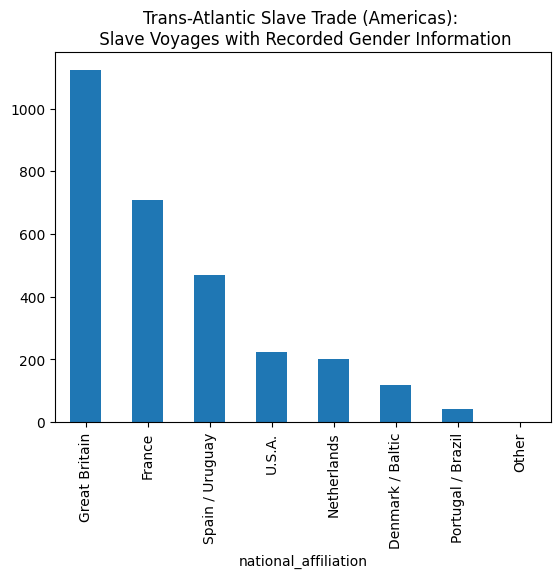

In [38]:
slave_voyages_df.groupby('national_affiliation')['percent_women'].count()\
.sort_values(ascending=False).plot(
    kind='bar', 
    title='Trans-Atlantic Slave Trade (Americas): \n Slave Voyages with Recorded Gender Information'
)

## 11. Make Time Series with Groupby

To make a time series, we would typically want to convert our date column into datetime values rather than integers.

In [39]:
slave_voyages_df['year_of_arrival'].dtype

dtype('int64')

Datetime values allow us to do special things that we can't do with regular integers and floats, such as extract just the year, month, week, day, or second from any date or aggregate based on any of the above.

However, we can also make some simple time series plots just by grouping by the year column and performing calculations on those year groupings, such as calculating the average percentage of enslaved women aboard the voyages over time.

In [40]:
slave_voyages_df.groupby('year_of_arrival')['total_women'].sum()

year_of_arrival
1520    0.0
1525    0.0
1526    0.0
1527    0.0
1532    0.0
       ... 
1862    0.0
1863    0.0
1864    0.0
1865    0.0
1866    0.0
Name: total_women, Length: 330, dtype: float64

In [41]:
total_women_by_year = slave_voyages_df.groupby('year_of_arrival')['total_women'].sum()

<Axes: xlabel='year_of_arrival'>

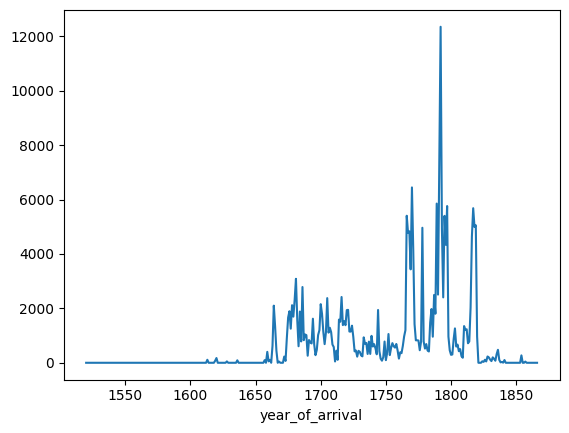

In [42]:
total_women_by_year.plot()

<Axes: title={'center': 'Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women on Voyages'}, xlabel='year_of_arrival'>

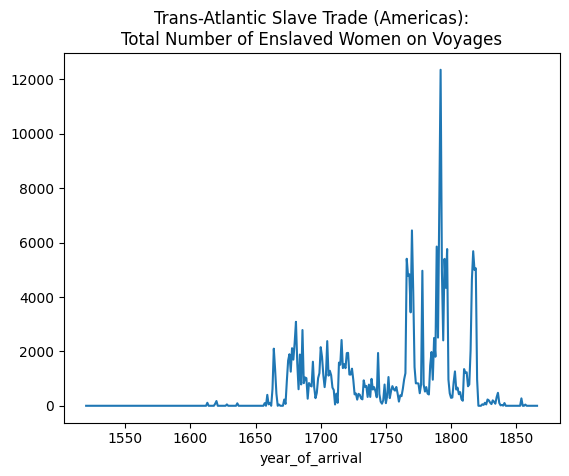

In [43]:
total_women_by_year.plot(
    kind='line', 
    title="Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women on Voyages"
)

We can put different plots on the same axes by assigning one of the plots to the variable `ax`, short for axes, and then using `ax=ax` in the other plot to explicitly put it on the same axes.

In [44]:
total_men_by_year = slave_voyages_df.groupby('year_of_arrival')['total_men'].sum()

<Axes: title={'center': 'Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women on Voyages'}, xlabel='year_of_arrival'>

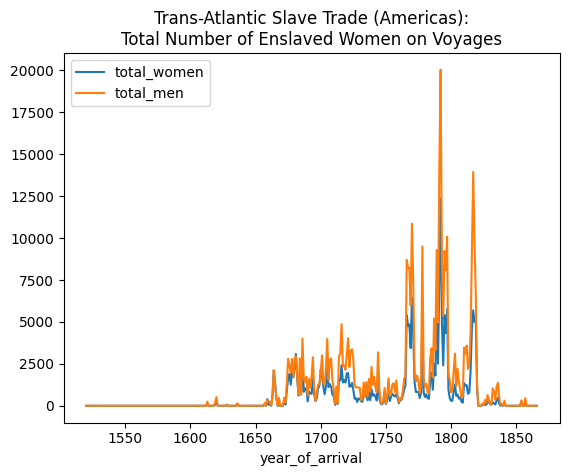

In [45]:
ax = total_women_by_year.plot(
    kind='line',
    legend= True,
    title="Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women on Voyages"
)
total_men_by_year.plot(
    ax=ax, 
    legend=True
)

We can change the labels in a legend by using the `label=` parameter.

<Axes: title={'center': 'Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women on Voyages'}, xlabel='year_of_arrival'>

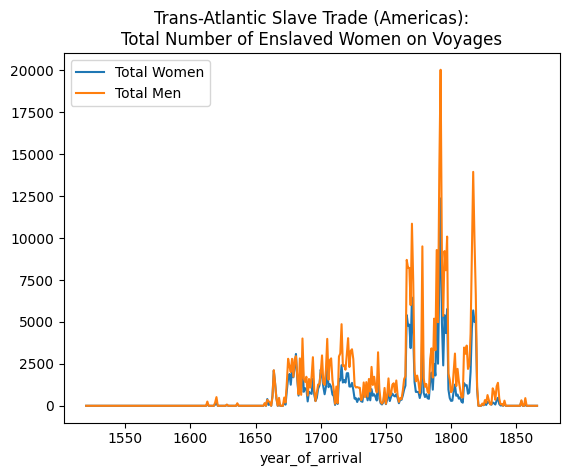

In [46]:
ax = total_women_by_year.plot(
    kind='line', 
    label="Total Women", 
    legend= True, 
    title="Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women on Voyages"
)
total_men_by_year.plot(
    ax=ax, 
    label="Total Men", 
    legend=True
)

Finally, we can also add in the total number of enslaved people who embarked on the voyages, offering a perspective of how much gender information we have about the voyages compared to the total number of voyages.

In [47]:
total_embarked_by_year = slave_voyages_df.groupby('year_of_arrival')['total_embarked'].sum()

<Axes: title={'center': 'Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women on Voyages'}, xlabel='year_of_arrival'>

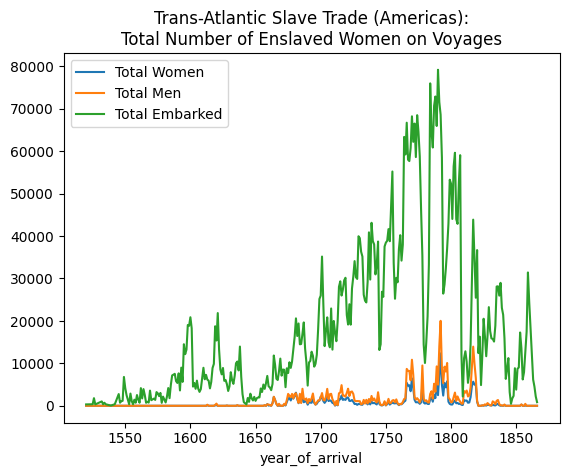

In [48]:
# Instantiate chart with men
ax = total_women_by_year.plot(
    kind='line', 
    label="Total Women", 
    legend= True, 
    title="Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women on Voyages"
)

# Add men
total_men_by_year.plot(
    ax=ax, 
    label="Total Men", 
    legend=True
)

# Add embarked
total_embarked_by_year.plot(
    ax=ax,
    label="Total Embarked",
    legend=True
)

## 12. Save Plots

To save a plot as an image file or PDF file, we can again assign the plot to a variable called `ax`, short for axes.

Then we can use `ax.figure.savefig('FILE-NAME.png')` or `ax.figure.savefig('FILE-NAME.pdf')`.

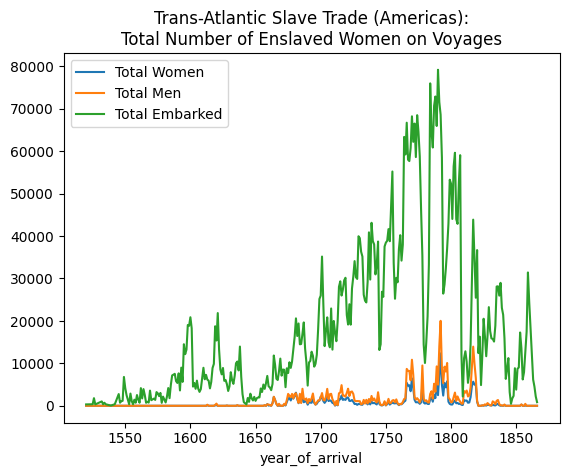

In [49]:
ax = total_women_by_year.plot(
    kind='line', 
    label="Total Women", 
    legend= True, 
    title="Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women on Voyages"
)
total_men_by_year.plot(
    ax=ax, 
    label="Total Men", 
    legend=True
)
total_embarked_by_year.plot(
    ax=ax, 
    label="Total Embarked", 
    legend=True
)

ax.figure.savefig('./figures/Trans-Atlantic-Slave-Trade_Gender-Info.png')

## 13. Prevent Labels From Getting Cut Off

If labels are getting cut off in your image, you can explicitly:

1. import `matplotlib.pyplot`, which is the data viz Python library that Pandas `.plot()`s are built on. 
2. You can use the `tight_layout()` function to automate the process to fix this layout issue

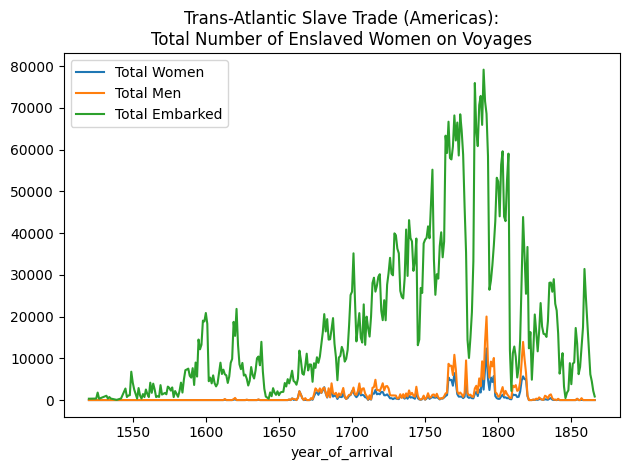

In [50]:
import matplotlib.pyplot as plt

ax = total_women_by_year.plot(
    kind='line', 
    label="Total Women", 
    legend= True, 
    title="Trans-Atlantic Slave Trade (Americas):\nTotal Number of Enslaved Women on Voyages"
)

total_men_by_year.plot(
    ax=ax, 
    label="Total Men", 
    legend=True
)

total_embarked_by_year.plot(
    ax=ax, 
    label="Total Embarked",
    legend=True
)

plt.tight_layout()
ax.figure.savefig('./figures/Trans-Atlantic-Slave-Trade_Gender-Info.png')